# A/B Testing

We are doing a A/B testing to check different hypothesis to increase the revenue for the Online Store.

In [1]:
#import all the libraries neccesaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

In [2]:
#Read all the libraries and assign them to a variable for easy access
hypo_log = '/datasets/hypotheses_us.csv'
orders_log = '/datasets/orders_us.csv'
visits_log = '/datasets/visits_us.csv'

The following code will read and clean the 'hypo' dataset

In [3]:
#Read the csv file
hypo  = pd.read_csv(hypo_log, delimiter=';')

In [4]:
#Print the head to make sure it was read properly
hypo.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [5]:
#Print the info of the dataset to check on data types per column
hypo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


All the columns are the right data type

In [6]:
#Check on missing parts of the dataset even if its small
hypo.isnull().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Effort        0
dtype: int64

There are no empty values in dataset

The following code will read and clean the 'orders' dataset

In [7]:
#Read the csv file
orders  = pd.read_csv(orders_log)

In [8]:
#Print the head to make sure it was read properly
print(orders.head(5))

   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     30.4     B
1     2804400009  3642806036  2019-08-15     15.2     B
2     2961555356  4069496402  2019-08-15     10.2     A
3     3797467345  1196621759  2019-08-15    155.1     B
4     2282983706  2322279887  2019-08-15     40.5     B


In [9]:
#Print the info of the dataset to check on data types per column
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


All the columns are the right data type

In [10]:
#Check on missing parts of the dataset
orders.isnull().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

No data is missing from the datasets columns

In [11]:
#check for duplicates in the dataset
print(orders.duplicated().sum())

0


There seems to be no duplicates.

The following code will clean the 'visits' dataset.

In [12]:
#Read the csv file
visits = pd.read_csv(visits_log)

In [13]:
#Print the head to make sure it was read properly
print(visits.head(5))

         date group  visits
0  2019-08-01     A     719
1  2019-08-02     A     619
2  2019-08-03     A     507
3  2019-08-04     A     717
4  2019-08-05     A     756


In [14]:
#Group by visitorId and count the number of unique groups each visitor is in
visitor_group_counts = orders.groupby('visitorId')['group'].nunique().reset_index()

In [15]:
#Identify visitors who have been in both groups
visitors_in_both_groups = visitor_group_counts[visitor_group_counts['group'] > 1]['visitorId']

print("Visitors in both groups:")
print(visitors_in_both_groups)

Visitors in both groups:
2          8300375
44       199603092
51       232979603
55       237748145
66       276558944
84       351125977
97       393266494
114      457167155
119      471551937
122      477780734
192      818047933
236      963407295
299     1230306981
311     1294878855
316     1316129916
318     1333886533
340     1404934699
386     1602967004
393     1614305549
402     1648269707
406     1668030113
422     1738359350
436     1801183820
469     1959144690
487     2038680547
491     2044997962
569     2378935119
591     2458001652
614     2579882178
619     2587333274
622     2600415354
639     2654030115
648     2686716486
661     2712142231
662     2716752286
677     2780786433
710     2927087541
715     2949041841
718     2954449915
744     3062433592
784     3202540741
792     3234906277
884     3656415546
897     3717692402
909     3766097110
917     3803269165
932     3891541246
950     3941795274
954     3951559397
957     3957174400
958     3963646447
960   

In [16]:
#Confirm override of the variable
print(visits.head(10))

         date group  visits
0  2019-08-01     A     719
1  2019-08-02     A     619
2  2019-08-03     A     507
3  2019-08-04     A     717
4  2019-08-05     A     756
5  2019-08-06     A     667
6  2019-08-07     A     644
7  2019-08-08     A     610
8  2019-08-09     A     617
9  2019-08-10     A     406


Row 7 is not there which means override worked.

In [17]:
#Print the info of the dataset to check on data types per column
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


All the columns are the right data type

In [18]:
#Check on missing parts of the dataset
orders.isnull().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

No data is missing from the datasets columns

In [19]:
#check for duplicates in the dataset
print(orders.duplicated().sum())

0


There seems to be no duplicates 

# Prioritizing Hypotheses

When testing hypotheses, picking the right one is some what complicated but with analysis we can conclude which one is the most helpful one to make the most out of the money that is being used for testing different groups in the A/B testing of the hypotheses.

In [20]:
print(hypo.head(5))

                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  


In [21]:
pd.set_option('display.max_colwidth', None)

Sort the Hypothesis dataset into ICE priority

In [22]:
#ICE calculation to rate it
hypo['ICE Score'] = (hypo['Impact'] * hypo['Confidence']) / hypo['Effort']

In [23]:
#Sort the dataset in ascending order
sorted_hypo = hypo.sort_values(by='ICE Score', ascending=False)
print(sorted_hypo.head(10))

                                                                                                               Hypothesis  \
8                                                        Launch a promotion that gives users discounts on their birthdays   
0                                             Add two new channels for attracting traffic. This will bring 30% more users   
7                                Add a subscription form to all the main pages. This will help you compile a mailing list   
6                                 Show banners with current offers and sales on the main page. This will boost conversion   
2          Add product recommendation blocks to the store's site. This will increase conversion and average purchase size   
1                                                       Launch your own delivery service. This will shorten delivery time   
5                                                     Add a customer review page. This will increase the number of orders   


Sort the Hypothesis dataset into RICE priority

In [24]:
#RICE calculation to rate it
hypo['RICE'] = (hypo['Reach'] * hypo['Impact'] * hypo['Confidence']) / hypo['Effort']

In [25]:
print(hypo.columns)

Index(['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Effort', 'ICE Score',
       'RICE'],
      dtype='object')


In [26]:
#Sort the dataset in ascending order
print(hypo)
print(hypo[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False))

                                                                                                               Hypothesis  \
0                                             Add two new channels for attracting traffic. This will bring 30% more users   
1                                                       Launch your own delivery service. This will shorten delivery time   
2          Add product recommendation blocks to the store's site. This will increase conversion and average purchase size   
3  Change the category structure. This will increase conversion since users will find the products they want more quickly   
4                                        Change the background color on the main page. This will increase user engagement   
5                                                     Add a customer review page. This will increase the number of orders   
6                                 Show banners with current offers and sales on the main page. This will boost conversion   


In [27]:
#Print both columns next to each other to see them better
print(hypo[['ICE Score','RICE']])

   ICE Score   RICE
0  13.333333   40.0
1   2.000000    4.0
2   7.000000   56.0
3   1.125000    9.0
4   1.000000    3.0
5   1.333333    4.0
6   8.000000   40.0
7  11.200000  112.0
8  16.200000   16.2


Althought with the ICE score 8 is on the first place, once moved we use the RICE score it all changes since RICE takes in account the reach to see how many will be affected by this. After doing the RICE score, the 8th hypothesis goes down to being 5th place. AS the reach is only 1.

# A/B Test Analysis

### 1. Cumulative revenue by group

In [28]:
#Convert the 'date' column to datetime
orders['date'] = pd.to_datetime(orders['date'])
orders['revenue'] = pd.to_numeric(orders['revenue'], errors='coerce')
orders['group'] = orders['group'].astype('category')

In [29]:
#Handle any missing or incorrect data
orders = orders.dropna(subset=['revenue'])

In [30]:
#Sort the data by date
orders = orders.sort_values('date')

In [31]:
#Calculate cumulative revenue for each group
orders['cumulative_revenue'] = orders.groupby('group')['revenue'].cumsum()

In [32]:
#Pivot the data to ahve the dates as rows and groups as columns
cumulative_revenue_df = orders.pivot_table(index='date', columns='group', values='cumulative_revenue', fill_value=0)

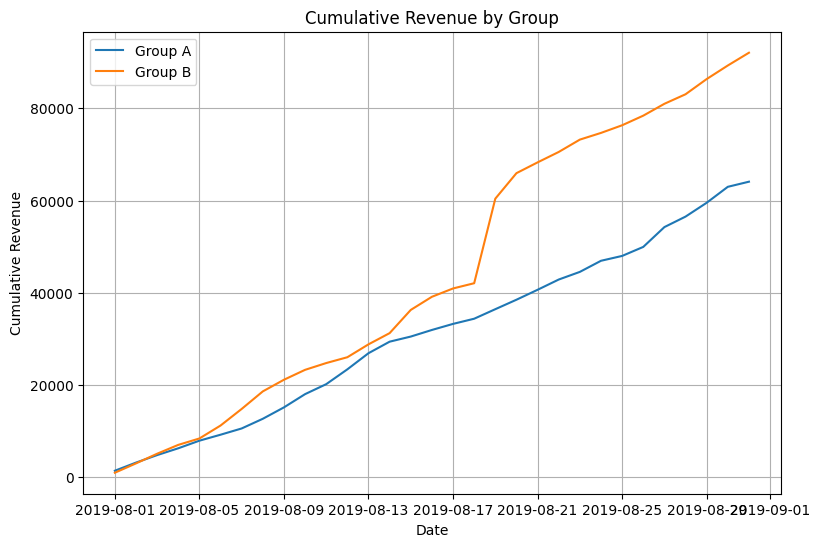

In [33]:
#Plot cumulative revenue by group
plt.figure(figsize=(9, 6))
plt.plot(cumulative_revenue_df.index, cumulative_revenue_df['A'], label='Group A')
plt.plot(cumulative_revenue_df.index, cumulative_revenue_df['B'], label='Group B')
plt.xlabel('Date')
plt.ylabel('Cumulative Revenue')
plt.title('Cumulative Revenue by Group')
plt.legend()
plt.grid(True)
plt.show()

After the 17th of august Group A and Group B start to part ways as Group A starts to show how they have more revenue compare to Group B. There was an initial gap but on the 13 it was close short. Until the 17th when Group A took the lead by a lot.

### 2. Cumulative average order size by group.

In [34]:
#Calculate cumulative revenue for each group
orders['cumulative_revenue'] = orders.groupby('group')['revenue'].cumsum()

In [35]:
#Calculate cumulative count of orders for each group
orders['cumulative_orders'] = orders.groupby('group').cumcount() + 1

In [36]:
#Calculate cumulative average order size
orders['cumulative_avg_order_size'] = orders['cumulative_revenue'] / orders['cumulative_orders']

In [37]:
#Pivot the data to have dates as rows and groups as columns
cumulative_avg_order_size_data = orders.pivot_table(index='date', columns='group', values='cumulative_avg_order_size', fill_value=0)

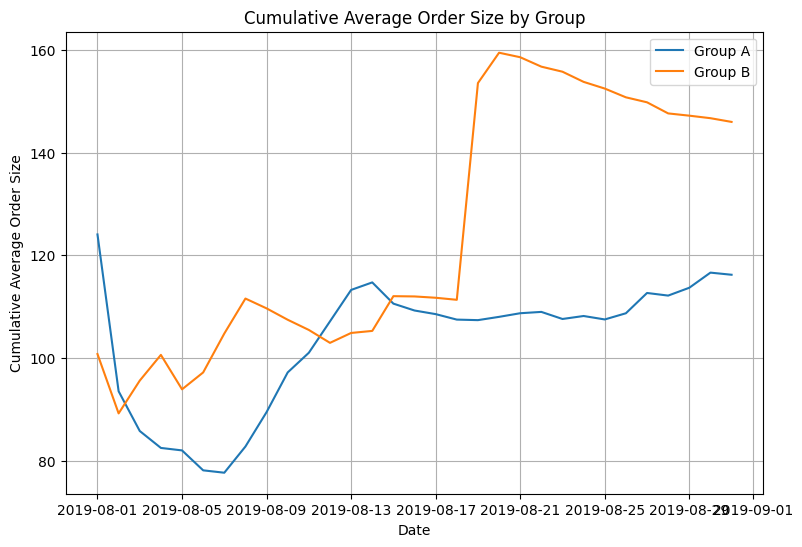

In [38]:
#Plot cumulative average order size by group
plt.figure(figsize=(9, 6))
plt.plot(cumulative_avg_order_size_data.index, cumulative_avg_order_size_data['A'], label='Group A')
plt.plot(cumulative_avg_order_size_data.index, cumulative_avg_order_size_data['B'], label='Group B')
plt.xlabel('Date')
plt.ylabel('Cumulative Average Order Size')
plt.title('Cumulative Average Order Size by Group')
plt.legend()
plt.grid(True)
plt.show()

Again, Group A is taking the lead from Group B after the 17th of August. Prior to that they are both very similar, after this time the order size increase from 110 to 160.

### 3. Relative difference between cumulative average order size.

In [39]:
# Convert 'date' to datetime format and 'group' to category
orders['date'] = pd.to_datetime(orders['date'])
orders['group'] = orders['group'].astype('category')

# Aggregate revenue and order count by date and group
daily_revenue = orders.groupby(['date', 'group']).agg({'revenue': 'sum', 'cumulative_orders': 'sum'}).reset_index()

# Calculate the cumulative sum of revenue and order count
daily_revenue['cumulative_revenue'] = daily_revenue.groupby('group')['revenue'].cumsum()
daily_revenue['cumulative_order_count'] = daily_revenue.groupby('group')['cumulative_orders'].cumsum()

# Calculate the cumulative average order size
daily_revenue['cumulative_avg_order_size'] = daily_revenue['cumulative_revenue'] / daily_revenue['cumulative_order_count']

# Pivot the table to get cumulative average order size for each group
pivot_table = daily_revenue.pivot(index='date', columns='group', values='cumulative_avg_order_size')

pivot_table.head()

group,A,B
date,,
2019-08-01,7.856000,7.012987
2019-08-02,3.899293,4.100290
2019-08-03,2.419224,3.199683
2019-08-04,1.910952,2.521227
2019-08-05,1.469591,1.798272


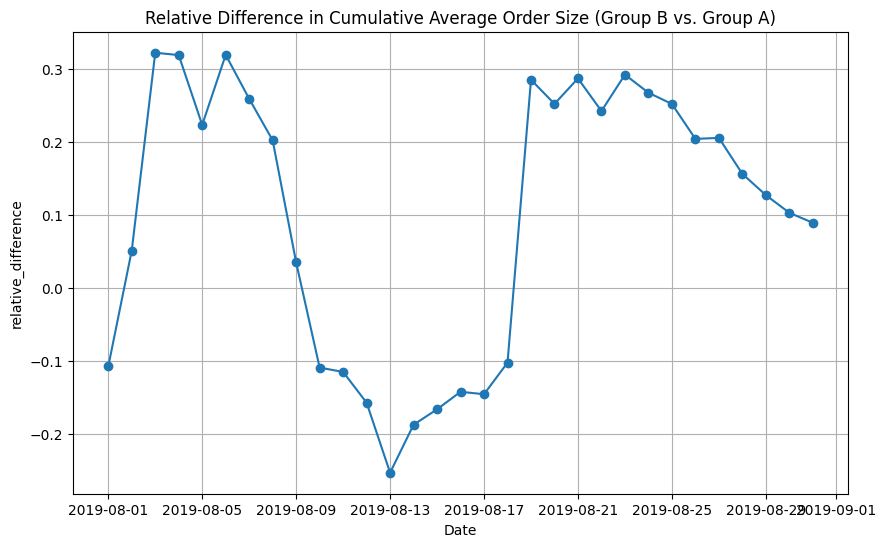

In [40]:
# Calculate the relative difference
relative_difference = (pivot_table['B'] - pivot_table['A']) / pivot_table['A']

# Plot the relative difference
plt.figure(figsize=(10, 6))
plt.plot(pivot_table.index, relative_difference, marker='o', linestyle='-')
plt.title('Relative Difference in Cumulative Average Order Size (Group B vs. Group A)')
plt.xlabel('Date')
plt.ylabel('relative_difference')
plt.grid(True)
plt.show()

According to our graph there is a significant spike at the beginning of the graph around the start of August 2019. This indicates how there is a large difference between both groups. After the initial spike, the relative difference goes down and hovers close to zero. Which suggests that over time, the average order size of the two groups becomes more similar.

### 4. Group's conversation rate

In [41]:
#Check for correct data types 
orders['group'] = orders['group'].astype('category')
visits['group'] = visits['group'].astype('category')
orders.head(), visits.head()

(     transactionId   visitorId       date  revenue group  cumulative_revenue  \
 168     2065527789  1581167209 2019-08-01     30.4     A                30.4   
 73      1295850747  2947100995 2019-08-01    455.8     A               486.2   
 72       477940151  1422773200 2019-08-01     15.8     A               502.0   
 71      3679129301     8300375 2019-08-01    165.7     B               165.7   
 70      3574407166  2328378067 2019-08-01    140.4     B               306.1   
 
      cumulative_orders  cumulative_avg_order_size  
 168                  1                  30.400000  
 73                   2                 243.100000  
 72                   3                 167.333333  
 71                   1                 165.700000  
 70                   2                 153.050000  ,
          date group  visits
 0  2019-08-01     A     719
 1  2019-08-02     A     619
 2  2019-08-03     A     507
 3  2019-08-04     A     717
 4  2019-08-05     A     756)

In [42]:
#Convert the 'date' column to datetime
orders['date'] = pd.to_datetime(orders['date'])
visits['date'] = pd.to_datetime(visits['date'])

In [43]:
#Calculate the daily number of orders for each group
daily_orders = orders.groupby(['date', 'group']).size().reset_index(name='daily_orders')

In [44]:
#Merge daily orders with visits data
merged = pd.merge(daily_orders, visits, on=['date', 'group'])

In [45]:
#Calculate conversation rate
merged['conversion_rate'] = merged['daily_orders'] / merged['visits']

In [46]:
#Pibot the daily conversation rates by group
conversion_rate_df = merged.pivot_table(index='date', columns='group', values='conversion_rate')

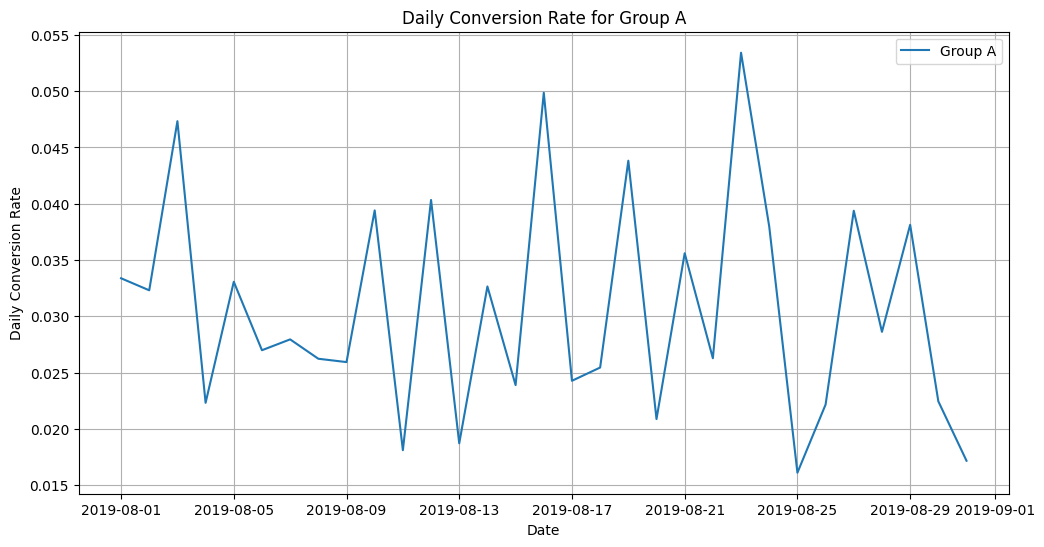

In [47]:
#Plot the daily conversation rate for group A
plt.figure(figsize=(12, 6))
plt.plot(conversion_rate_df.index, conversion_rate_df['A'], label='Group A')
plt.xlabel('Date')
plt.ylabel('Daily Conversion Rate')
plt.title('Daily Conversion Rate for Group A')
plt.legend()
plt.grid(True)
plt.show()

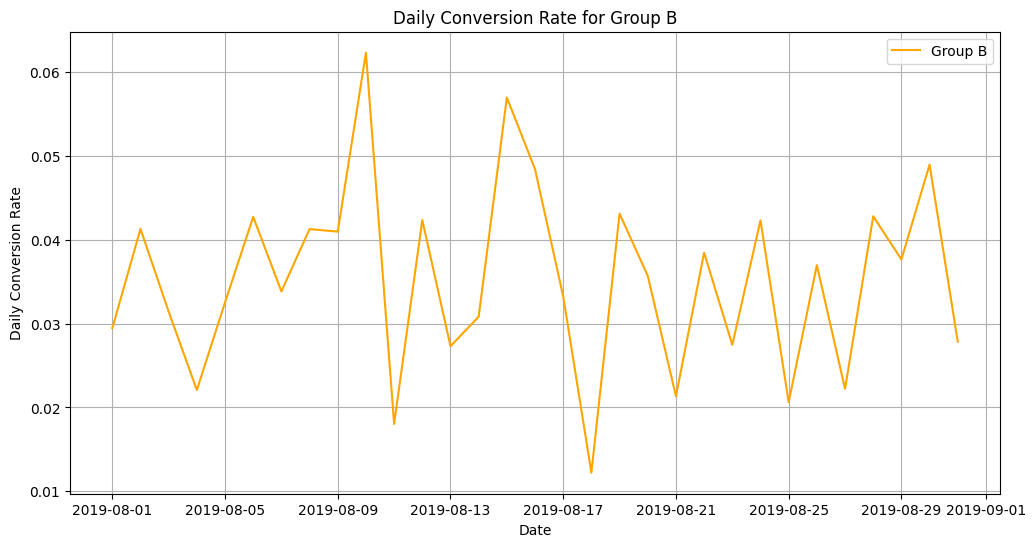

In [48]:
#Plot the daily conversation rate for group B
plt.figure(figsize=(12, 6))
plt.plot(conversion_rate_df.index, conversion_rate_df['B'], label='Group B', color='orange')
plt.xlabel('Date')
plt.ylabel('Daily Conversion Rate')
plt.title('Daily Conversion Rate for Group B')
plt.legend()
plt.grid(True)
plt.show()

Both Group's exhibit significant fluctuations in daily conversation rates throughout the period. There are several peaks and troughs indicating variability in daily conversion performance. If we look at it day to day, no group consistently ourperforms the other during the period of time. They both have days in which they perform better or worse compare to the other group. Overlapping and divergence happens a lot during the time, there are days in which both groups are very close to each other, and other days when they diverge signicantly.

### 5. Number of orders per user

In [49]:
#Calculate the number of order per user
orders_per_user = orders.groupby('visitorId').size().reset_index(name='number_of_orders')

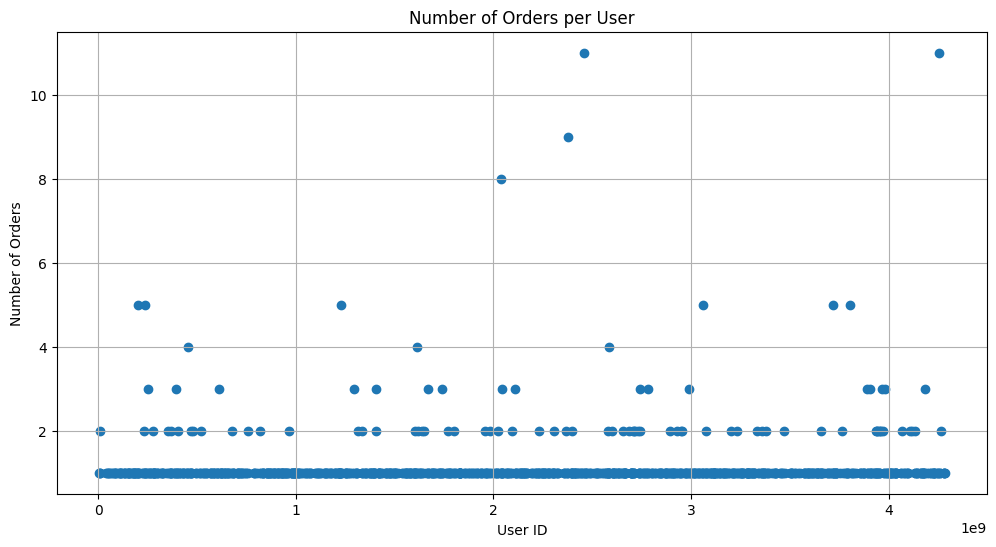

In [50]:
#Plot the scatter chart
plt.figure(figsize=(12, 6))
plt.scatter(orders_per_user['visitorId'], orders_per_user['number_of_orders'])
plt.xlabel('User ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per User')
plt.grid(True)
plt.show()

It seems like majority of users have placed one or two orders. There are a few outliers with significantly higher number of orders. These represent those who have place over 11 orders. There is also a spread of users who have placed 3-6 orders, showing a moderate level of engagement. We have a high proportion of one time buyers.

### 6. The percentiles for number of order per user

In [51]:
#Calculate the number of orders per user
orders_per_user = orders.groupby('visitorId').size().reset_index(name='number_of_orders')

In [52]:
#Calculate the 95th and 99th percentiles for the number of orders per user
percentile_95 = orders_per_user['number_of_orders'].quantile(0.95)
percentile_99 = orders_per_user['number_of_orders'].quantile(0.99)

In [53]:
#Define the anomaly threshold based on the 99th percentiles
anomaly_threshold = percentile_99

In [54]:
#Print the percentiles and anomaly threshold
print("95th Percentile:", percentile_95)
print("99th Percentile:", percentile_99)
print("Anomaly Threshold (99th Percentile):", anomaly_threshold)

95th Percentile: 2.0
99th Percentile: 4.0
Anomaly Threshold (99th Percentile): 4.0


The point at which a data point becomes an anomaly is once it passes the Anomaly Threshold which is 4.0

### 7. Scatter plot of order prices

In [55]:
#Remove orders with the price over 19,000
orders = orders[orders['revenue'] < 19000]

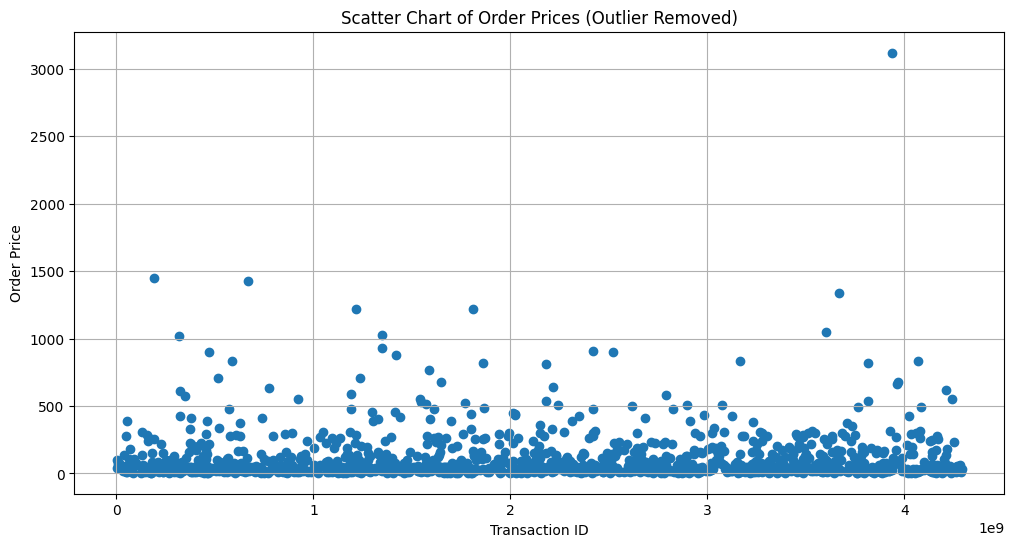

In [56]:
#Plot the scatter chart of order price
plt.figure(figsize=(12, 6))
plt.scatter(orders['transactionId'], orders['revenue'])
plt.xlabel('Transaction ID')
plt.ylabel('Order Price')
plt.title('Scatter Chart of Order Prices (Outlier Removed)')
plt.grid(True)
plt.show()

Most of the orders seem to b earound the value of 200 to 300 with some going up to 1000 and more. One order with more than 19,000.00 which was remove for better visualization of the scatter plot.

### 8. Calculate the 95th and 99th percentiles of order prices.

In [57]:
#Calculate the 95th and 99th percentiles for order prices
percentile_95 = orders['revenue'].quantile(0.95)
percentile_99 = orders['revenue'].quantile(0.99)

In [58]:
#Define the anomaly threshold based on the 99th percentile
anomaly_threshold = percentile_99

In [59]:
#Display the percentiles and anomaly threshold
print("95th Percentile:", percentile_95)
print("99th Percentile:", percentile_99)
print("Anomaly Threshold (99th Percentile):", anomaly_threshold)

95th Percentile: 428.29999999999995
99th Percentile: 900.7
Anomaly Threshold (99th Percentile): 900.7


The anomaly happens once the price passes the point of 900.7 which is the 99th percentile.

### 9. Statistical significance of the difference in conversion between the groups using the raw data

In [60]:
#Calculate the number of orders for each group
orders_count = orders.groupby('group')['transactionId'].nunique().reset_index()
orders_count.columns = ['group', 'orders']

In [61]:
#Calculate the number of visits for each group
visits_count = visits.groupby('group')['visits'].sum().reset_index()

In [62]:
#Merge the counts to create the contigency table
contingency_table = pd.merge(orders_count, visits_count, on='group')
contingency_table.columns = ['group', 'orders', 'visits']

print("Contingency Table:")
print(contingency_table)

Contingency Table:
  group  orders  visits
0     A     557   18736
1     B     639   18916


In [63]:
#Create the contingency table for the chi-square test
contingency_matrix = [
    [contingency_table.loc[contingency_table['group'] == 'A', 'orders'].values[0],
     contingency_table.loc[contingency_table['group'] == 'A', 'visits'].values[0] - contingency_table.loc[contingency_table['group'] == 'A', 'orders'].values[0]],
    [contingency_table.loc[contingency_table['group'] == 'B', 'orders'].values[0],
     contingency_table.loc[contingency_table['group'] == 'B', 'visits'].values[0] - contingency_table.loc[contingency_table['group'] == 'B', 'orders'].values[0]]
]

print("Contingency Matrix:")
print(contingency_matrix)

Contingency Matrix:
[[557, 18179], [639, 18277]]


In [64]:
#Test the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_matrix)

print(f"Chi-square test statistic: {chi2}")
print(f"P-value: {p}")

Chi-square test statistic: 4.894230384476381
P-value: 0.026946581487526742


With the results of the P-value and Chi-square, since the p-value is less than 0.05, we decide to reject the null hypothesis. The chi-square test statistic is 4.832. There is a clear significant difference between one and the other. If Group B has a higher conversion rate than Group A, it could indicate that the strategies applied to Group B are more effective.

### 10. Statistical significance of the difference in average order size between the groups using the raw data.

In [65]:
#Calculate the average order size for each group
average_order_size = orders.groupby('group')['revenue'].mean().reset_index()
average_order_size.columns = ['group', 'average_order_size']

print("Average Order Size:")
print(average_order_size)

Average Order Size:
  group  average_order_size
0     A          115.897487
1     B          114.116119


In [66]:
#Extract the order sizes for each group
group_a_orders = orders[orders['group'] == 'A']['revenue']
group_b_orders = orders[orders['group'] == 'B']['revenue']

In [67]:
#Perform a two-sample test
t_stat, p_value = ttest_ind(group_a_orders, group_b_orders, equal_var=False)

print(f"T-test statistic: {t_stat}")
print(f"P-value: {p_value}")

T-test statistic: 0.16281164884946742
P-value: 0.870694407195896


The p-value is 0.871, which is significantly higher than the common significance level of 0.05. Since the p-value is much greater than 0.05, we fail to reject the null hypothesis. The t-test statistic of 0.163 indicates that the difference is very small relative to the variability in the data.

### 11. Statistical significance of the difference in conversion between the groups using the filtered data.

In [68]:
#Filter out any orders with a revenue of 19,000
orders_df_filtered = orders[orders['revenue'] != 19000]

In [69]:
#Calculate the number of orders for each group
orders_count_filtered = orders_df_filtered.groupby('group')['transactionId'].nunique().reset_index()
orders_count_filtered.columns = ['group', 'orders']

In [70]:
#Calculate the number of visits for each group
visits_count = visits.groupby('group')['visits'].sum().reset_index()

In [71]:
#Merge the counts to create the contigency table
contingency_table_filtered = pd.merge(orders_count_filtered, visits_count, on='group')
contingency_table_filtered.columns = ['group', 'orders', 'visits']

print("Contingency Table (Filtered Data):")
print(contingency_table_filtered)


Contingency Table (Filtered Data):
  group  orders  visits
0     A     557   18736
1     B     639   18916


In [72]:
#Create the contingency table for the chi-square table
contingency_matrix_filtered = [
    [contingency_table_filtered.loc[contingency_table_filtered['group'] == 'A', 'orders'].values[0],
     contingency_table_filtered.loc[contingency_table_filtered['group'] == 'A', 'visits'].values[0] - contingency_table_filtered.loc[contingency_table_filtered['group'] == 'A', 'orders'].values[0]],
    [contingency_table_filtered.loc[contingency_table_filtered['group'] == 'B', 'orders'].values[0],
     contingency_table_filtered.loc[contingency_table_filtered['group'] == 'B', 'visits'].values[0] - contingency_table_filtered.loc[contingency_table_filtered['group'] == 'B', 'orders'].values[0]]
]

print("Contingency Matrix (Filtered Data):")
print(contingency_matrix_filtered)


Contingency Matrix (Filtered Data):
[[557, 18179], [639, 18277]]


In [73]:
#Perform the chi-square test
chi2_filtered, p_filtered, dof_filtered, expected_filtered = chi2_contingency(contingency_matrix_filtered)

print(f"Chi-square test statistic: {chi2_filtered}")
print(f"P-value: {p_filtered}")

Chi-square test statistic: 4.894230384476381
P-value: 0.026946581487526742


The p-value is less than 0.05, which mean we reject the null hypothesis as well with the filtered data.

### 12. Statistical significance of the difference in average order size between the groups using the filtered data. 

In [74]:
#Filter out any orders with a revenue of 19,000
orders_df_filtered = orders[orders['revenue'] != 19000]

In [75]:
#Calculate the average order size for each group
average_order_size_filtered = orders_df_filtered.groupby('group')['revenue'].mean().reset_index()
average_order_size_filtered.columns = ['group', 'average_order_size']

print("Average Order Size (Filtered Data):")
print(average_order_size_filtered)

Average Order Size (Filtered Data):
  group  average_order_size
0     A          115.897487
1     B          114.116119


In [76]:
#Extract the order sizes for each group
group_a_orders_filtered = orders_df_filtered[orders_df_filtered['group'] == 'A']['revenue']
group_b_orders_filtered = orders_df_filtered[orders_df_filtered['group'] == 'B']['revenue']

In [77]:
#Perform a two-sample t-test
t_stat_filtered, p_value_filtered = ttest_ind(group_a_orders_filtered, group_b_orders_filtered, equal_var=False)

print(f"T-test statistic: {t_stat_filtered}")
print(f"P-value: {p_value_filtered}")

T-test statistic: 0.16281164884946742
P-value: 0.870694407195896


The value again is higher than 0.05. Since the p-value is much greather than 0.05, we fail to reject the hypothesis. The t-test statistic of 0.163 indicates that the difference is very small relative to the variability in the data.

# Final analysis

After all the testing we conducted, we will go with option 2, which is to conclude the testing and there is no major difference between the groups. After checking the raw and filtered data, there is not much of a difference between Group A and Group B. If possible it would be better to try a different hypotheses from the ones provided to see if other results are possible althought this might be more money for the company to spend if profit is not made from this. 